# Experiments with WCDS

In [1]:
# Imports

from wisard.wisard import WCDS
import time
from sklearn.datasets import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Datastream

# Complex8 (Static case)
url = "http://www2.cs.uh.edu/~ml_kdd/restored/Complex&Diamond/Complex8.data"
complex8 = pd.read_csv(url)
data = complex8
x = data["563.225"]
y = data["56.748"]
x = x / 675
y = y / 401
data = list(zip(x,y))
np.random.shuffle(data)
datastream = list(zip(data, list(range(len(data)))))

In [3]:
# Stream clustering (online clustering only)

start_time = time.time()

OMEGA = 5000
DELTA = 200
GAMMA = 200
EPSILON = 0.95
µ = 1

clusterer = WCDS(
    omega=OMEGA,
    delta=DELTA,
    gamma=GAMMA,
    epsilon=EPSILON,
    dimension=len(datastream[0][0]),
    µ=µ)

for i in datastream:
    obs, time_ = i
    clusterer.record(obs, time_, verbose=0)

end_time = time.time()
print("Time elapsed: {0:.2f}s".format(end_time - start_time))

Time elapsed: 68.76s


In [ ]:
predictions = []

for i in datastream:
    obs, time_ = i
    predictions.append(clusterer.predict(obs))

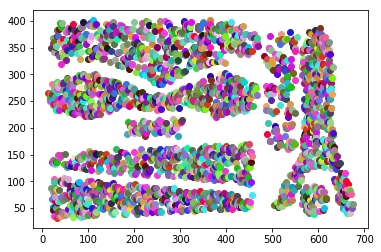

In [6]:
number_of_colors = 300

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
color_dict = {key: value for (key, value) in zip(list(range(len(colors))), colors)}

for i in range(len(predictions)):
    k, confidence = predictions[i]
    plt.plot(x[i]*675, y[i]*401, marker="o", color=color_dict[int(k)])

plt.show()

In [ ]:
predictions.sort(key=operator.itemgetter(0))